### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

In [1]:
%run init.ipynb

# Algoritmo de Simon

Nos é fornecido um oráculo que retorna o valor de uma função
$$f:\{0,1\}^{n}\rightarrow \{0,1\}^{n}$$
tal que
$$f(x)=f(y) \text{ se e somente se } x=y\oplus s.$$
O problema de Simon é, fazendo perguntas para o oráculo, determinar se
$$s=00\cdots0 \text{ ou }s\ne00\cdots0.$$
OBS. Algumas vezes o problema de Simon é dito como o problema de determinar $s$.

Notemos que se
$$s=00\cdots 0 \text{ a função é } 1\text{-pra-}1,$$
ou seja, para diferentes valores de $x$ teremos diferentes valores de $f(x)$. Mas se
$$s\ne00\cdots 0 \text{ a função é } 2\text{-pra-}1,$$
ou seja, teremos 2 valores $x$ mapeados em um único valor $f(x)$.

Começamos inicializando 2 grupos de $n$ qubits no estado
$$|\Psi_{0}\rangle = |0\rangle^{\otimes n}\otimes|0\rangle^{\otimes n}.$$

Seguindo, como fizemos no algoritmo de Deutsch-Jozsa (ADJ) e no algoritmo de Bernstein-Vazirani (ABV), aplicamos portas de __Hadamard__ no primeiro grupo de $n$ qubits. Obtemos assim o estado
\begin{align}
|\Psi_{1}\rangle & = \big(H^{\otimes n}\otimes\mathbb{I}^{\otimes n}\big)|\Psi_{0}\rangle \\
& = H^{\otimes n}|0\rangle^{\otimes n}\otimes|0\rangle^{\otimes n} = |+\rangle^{\otimes n}\otimes|0\rangle^{\otimes n} \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\otimes|0\rangle^{\otimes n}.
\end{align}
O algoritmo de Simon está ilustrado na figura abaixo.
<img src='fig_simon.png' width='400'>

Também como nos ADJ e ABV, a ação do __oráculo__ é a seguinte
$$U_{f}|x\rangle\otimes|y\rangle=|x\rangle\otimes|y\oplus f(x)\rangle,$$
ou
$$U_{f} = \sum_{x,y=0}^{2^{n}-1}|x\rangle\langle x|\otimes|y\oplus f(x)\rangle\langle y|.$$
Com isso, aplicando o oráculo,  teremos que
\begin{align}
|\Psi_{2}\rangle &= U_{f}|\Psi_{1}\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}U_{f}|x\rangle\otimes|0\rangle^{\otimes n} \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}U_{f}|x\rangle\otimes|0\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\otimes|0\oplus f(x)\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\otimes|f(x)\rangle.
\end{align}
_OBS._ Diferente dos ADJ e ABV, neste ponto do algoritmo de Simon (AS) parece que temos emaranhamento criado. Isso é interessante, uma vez que o AS é o 1º desta classe a prover uma separação exponencial clássico-quântico.

Seguindo, fazemos medidas no 2º grupo de $n$ qubits. A _probabilidade_ de obtermos o resultado $|j\rangle=|j_{1}j_{2}\cdots j_{n}\rangle$ é
\begin{align}
Pr(j|\Psi_{2}) & = \langle\Psi_{2}|\big(\mathbb{I}_{n}\otimes|j\rangle\langle j|\big)|\Psi_{2}\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}\langle x|\otimes\langle f(x)|\big(\mathbb{I}_{n}\otimes|j\rangle\langle j|\big)\frac{1}{2^{n/2}}\sum_{y=0}^{2^{n}-1}|y\rangle\otimes|f(y)\rangle \\
& = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}-1}\langle x|y\rangle\otimes\langle f(x)|j\rangle\langle j|f(y)\rangle  \\
& = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}-1}\delta_{x,y}\otimes\langle f(x)|j\rangle\langle j|f(y)\rangle \\
& = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}-1}\langle f(x)|j\rangle\langle j|f(x)\rangle \\
& = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}-1}\big|\langle f(x)|j\rangle\big|^{2} \\
& = \begin{cases} 2^{-n} \text{ se } f \text{ é 1-pra-1} \\
2^{-n+1} \text{ se } f \text{ é 2-pra-1} \end{cases}.
\end{align}

Se o resultado $|j\rangle$ é obtido, o estado pós medida é proporcional a
\begin{align}
\big(\mathbb{I}_{n}\otimes|j\rangle\langle j|\big)|\Psi_{2}\rangle  & = \big(\mathbb{I}_{n}\otimes|j\rangle\langle j|\big)\frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\otimes|f(x)\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\otimes\langle j|f(x)\rangle|j\rangle.
\end{align}

Então, se a função é $1\text{-pra-}1$, os $f(x)$ são todos distintos e obteremos o estado pós-medida
$$ |x\rangle\otimes|j\rangle = |f^{-1}(j)\rangle\otimes|j\rangle,$$
em que usamos $f(x)=j\ \therefore\ x=f^{-1}(f(x))=f^{-1}(j)$.

Se a função é $2\text{-pra-}1$, teremos 2 valores de $x$ tais que $f(x)=j$, e com isso o estado pós medida pode ser escrito como segue
$$2^{-1/2}\big(|x\rangle+|x'\rangle\big)\otimes|j\rangle = 2^{-1/2}\big(|x\rangle+|x\oplus s\rangle\big)\otimes|j\rangle.$$

Até aqui, não conseguimos obter informação alguma sobre $s$ pois os estados $|x\rangle$, tais que $f(x)=j$, são igualmente prováveis.

Seguindo, aplicaremos __portas de Hadamard__ em cada um dos $n$ qubits do 1º grupo de qubits. Antes, escrevemos
\begin{align}
H^{\otimes n} & = \frac{1}{2^{n/2}}\sum_{x,y=0}^{2^{n}-1}(-1)^{x\cdot y}|x\rangle\langle y| \\
& = \sum_{y=0}^{2^{n}-1}\Big(\frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{x\cdot y}|x\rangle\Big)\langle y| \\
& = \sum_{y=0}^{2^{n}-1}|\psi_{y}\rangle\langle y|,
\end{align}
em que usamos
$$|\psi_{y}\rangle = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{x\cdot y}|x\rangle.$$

No caso em que $s=00\cdots 0$, o estado evoluído será
\begin{align}
& \big(H^{\otimes n}\otimes\mathbb{I}_{2}^{\otimes n}\big)\big(|x\rangle\otimes|j\rangle\big) \\
& = \Big(\sum_{y=0}^{2^{n}-1}|\psi_{y}\rangle\langle y|\otimes\mathbb{I}_{2}^{\otimes n}\Big)\big(|x\rangle\otimes|j\rangle\big) \\
& = \sum_{y=0}^{2^{n}-1}|\psi_{y}\rangle\langle y|x\rangle\otimes|j\rangle = \sum_{y=0}^{2^{n}-1}|\psi_{y}\rangle\delta_{y,x}\otimes|j\rangle \\
& = |\psi_{x}\rangle\otimes|j\rangle = \frac{1}{2^{n/2}}\sum_{y=0}^{2^{n}-1}(-1)^{x\cdot y}|y\rangle\otimes|j\rangle \\
& = \frac{1}{2^{n/2}}\sum_{y_{1},\cdots,y_{n}=0}^{1}(-1)^{x_{1}y_{1}+\cdots x_{n}y_{n}}|y_{1}\cdots y_{n}\rangle\otimes|j\rangle.
\end{align}
Por conseguinte, neste caso, se medimos o 1º grupo de $n$ qubits na base computacional, obteremos qualquer um dos estados $|y_{1}\cdots y_{n}\rangle$ com igual probabilidade, $2^{-n}$.

No caso em que $s\ne00\cdots 0$, o estado evoluído será
\begin{align}
& \big(H^{\otimes n}\otimes\mathbb{I}_{2}^{\otimes n}\big)2^{-1/2}\big(\big(|x\rangle+|x\oplus s\rangle\big))\otimes|j\rangle\big) \\
& = \Big(\sum_{y=0}^{2^{n}-1}|\psi_{y}\rangle\langle y|\otimes\mathbb{I}_{2}^{\otimes n}\Big)2^{-1/2}\big(\big(|x\rangle+|x\oplus s\rangle\big)\otimes|j\rangle\big) \\
& = \frac{1}{2^{1/2}}\sum_{y=0}^{2^{n}-1}|\psi_{y}\rangle\big(\langle y|x\rangle+\langle y|x\oplus s\rangle\big)\otimes|j\rangle \\
& = \frac{1}{2^{1/2}}\sum_{y=0}^{2^{n}-1}|\psi_{y}\rangle\big(\delta_{y,x}+\delta_{y,x\oplus s}\big)\otimes|j\rangle \\
& = \frac{1}{2^{1/2}}\big(|\psi_{x}\rangle+|\psi_{x\oplus s}\rangle\big)\otimes|j\rangle \\
& = \frac{1}{2^{1/2}}\Big(\frac{1}{2^{n/2}}\sum_{y=0}^{2^{n}-1}(-1)^{y\cdot x}|y\rangle + \frac{1}{2^{n/2}}\sum_{y=0}^{2^{n}-1}(-1)^{y\cdot x\oplus s}|y\rangle\Big)\otimes|j\rangle \\
& = \frac{1}{2^{(n+1)/2}}\sum_{y=0}^{2^{n}-1}\big((-1)^{y\cdot x}+(-1)^{y\cdot x\oplus s}\big)|y\rangle\otimes|j\rangle \\
& = \frac{1}{2^{(n+1)/2}}\sum_{y=0}^{2^{n}-1}\big((-1)^{y\cdot x}+(-1)^{y\cdot x\oplus y\cdot s}\big)|y\rangle\otimes|j\rangle \\
& = \frac{1}{2^{(n+1)/2}}\sum_{y=0}^{2^{n}-1}(-1)^{y\cdot x}\big(1+(-1)^{y\cdot s}\big)|y\rangle\otimes|j\rangle.
\end{align}
 

A amplitude de probabilidade do estado $|y\rangle$ é não nula somente se
$$y\cdot s=0\mod2.$$
Todos os estados $|y\rangle$ com probabilidade não nula de serem obtidos tem a mesma probabilidade de aparecer. Assim, fazendo aproximadamente $n$ execuções do circuito quântico do AS, obtemos o sistema de equações a serem resolvidas e.g. por eliminação gaussiana:
\begin{align}
& y^{(1)}\cdot s = 0\mod2, \\
& y^{(2)}\cdot s = 0\mod2, \\
& \vdots \\
& y^{(n)}\cdot s = 0\mod2,
\end{align}
ou
\begin{align}
& \big(y^{(1)}_{1}s_{1}+\cdots+y^{(1)}_{1}s_{n}\big)\mod2 = 0\mod2, \\
& \big(y^{(2)}_{1}s_{1}+\cdots+y^{(2)}_{1}s_{n}\big)\mod2 = 0\mod2, \\
& \vdots \\
& \big(y^{(n)}_{1}s_{1}+\cdots+y^{(n)}_{1}s_{n}\big)\mod2 = 0\mod2, \\
\end{align}

Classicamente teríamos que chamar o oráculo, em média, $2^{n}/2+1 = 2^{n-1}+1$ vezes. Com isso, vemos que o algoritmo de Simon oferece um ganho exponencial em relação a algoritmos clássicos.

#### Exemplo ($n=2$)
Vamos considerar um exemplo de aplicação do algoritmo de Simon com string desconhecida
$$s=11$$
tal que $f(x)=f(y)\ \text{iff}\ y=x\oplus s$.

Começamos o 4 qubits preparados no estado
$$|\Psi_{0}\rangle = |00\rangle|00\rangle.$$
Aplicando as portas de Hadamard nos 2 primeiros qubits, obtemos
$$|\Psi_{1}\rangle = 2^{-2/2}\big(|00\rangle+|01\rangle+|10\rangle+|11\rangle\big)|00\rangle.$$
Seguindo aplicamos o oráculo
$$U_{f} = C_{x}^{1\rightarrow 3}C_{x}^{1\rightarrow 2}C_{x}^{0\rightarrow 3}C_{x}^{0\rightarrow 2}.$$


Com isso, obtemos o estado
\begin{align}
|\Psi_{2}\rangle & = 2^{-1}\big(|00\rangle|00\rangle + |01\rangle|11\rangle + |10\rangle|11\rangle + |11\rangle|00\rangle\big)
\end{align}
Medindo os 2 últimos qubits, obtemos os estados $|00\rangle$ ou $|11\rangle$, ambos com 50% de probabilidade. Se o resultado $|11\rangle$ foi obtido, o estado dos 2 primeiros qubits será
$$|\psi_{4}(11)\rangle = 2^{-1/2}(|01\rangle+|10\rangle).$$
Aplicando as portas de Hadamard neste 2 qubits, obteremos o estado
\begin{align}
|\psi_{5}(11)\rangle & = 2^{-1/2}(|+-\rangle+|-+\rangle) \\
& = 2^{-3/2}\big((|0\rangle+|1\rangle)(|0\rangle-|1\rangle) + (|0\rangle-|1\rangle)(|0\rangle+|1\rangle)\big) \\
& = 2^{-3/2}\big(|00\rangle-|01\rangle+|10\rangle-|11\rangle + |00\rangle+|01\rangle-|10\rangle-|11\rangle\big) \\
& = 2^{-1/2}\big(|00\rangle-|11\rangle\big).
\end{align}
Para este estado, obteremos os estados $|00\rangle$ ou $|11\rangle$ com mesma probabilidade, $1/2$. Teremos neste caso
\begin{align}
11\cdot s = 0, \\
00\cdot s = 0.
\end{align}
$00$ é sempre solução (trivial) desta equação. A única solução não trivial seria $s=11$. 

Para o outro resultado possível na medida dos 2 últimos qubits, $|00\rangle$, teremos o estado
$$|\psi_{4}(00)\rangle = 2^{-1/2}(|00\rangle+|11\rangle).$$
Neste caso o estado pós aplicação das Hadamard seria
\begin{align}
|\psi_{5}(00)\rangle & = 2^{-1/2}(|++\rangle+|--\rangle) \\
& = 2^{-3/2}\big((|0\rangle+|1\rangle)(|0\rangle+|1\rangle) + (|0\rangle-|1\rangle)(|0\rangle-|1\rangle)\big) \\
& = 2^{-3/2}\big(|00\rangle+|01\rangle+|10\rangle+|11\rangle + |00\rangle-|01\rangle-|10\rangle+|11\rangle\big) \\
& = 2^{-1/2}\big(|00\rangle+|11\rangle\big).
\end{align}
Do mesmo modo que no caso anterior, chegaríamos na conclusão de que $s=11$. 

Note que queremos diferenciar os casos 1-pra-1 ou $s=00$ do caso 2-pra-1 ou $s\ne 00$. Por isso, temos que executar o circuito várias vezes, para que a solução não trivial apareça. Com a inclusão do ruído, esse número de repetições tem que ser ainda maior, para que tenhamos certeza que a solução não trivial não é resultado só do ruído. Para o exemplo acima, a solução trivial é obtida 50% das vezes, embora a função seja 2-pra-1.

In [1]:
from qiskit import *
nshots = 8192
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')
simulator = Aer.get_backend('qasm_simulator')
device = provider.get_backend('ibm_nairobi')
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor, backend_overview, backend_monitor

NameError: name 'IBMQ' is not defined

In [ ]:
qr = QuantumRegister(4); cr = ClassicalRegister(4); qc = QuantumCircuit(qr,cr)
qc.h([0,1])
qc.barrier()
qc.cx(0,2); qc.cx(0,3); qc.cx(1,2); qc.cx(1,3) # oraculo
qc.barrier()
qc.measure([2,3],[2,3])
qc.barrier()
qc.h([0,1]); qc.measure([0,1],[0,1])
qc.draw(output='mpl')

In [5]:
jobS = execute(qc, backend = simulator, shots = nshots)

In [13]:
jobE = execute(qc, backend = device, shots = nshots)
job_monitor(jobE)

Job Status: job has successfully run


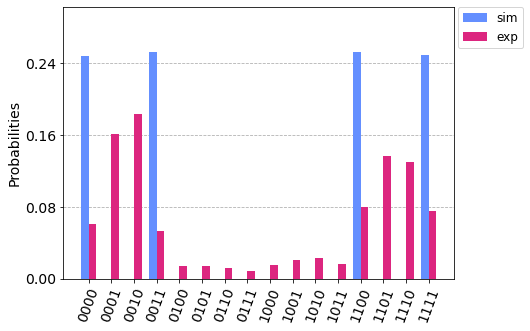

In [14]:
plot_histogram([jobS.result().get_counts(0), jobE.result().get_counts(0)], 
               bar_labels = False, legend = ['sim', 'exp'])

Não farei nenhuma análise sobre complexidade computacional. Mas observo que o algoritmo de Simon tem um ganho exponencial no número de queries em relação a algoritmos clássicos com erro limitado (ACEL). O algoritmo de Bernstein-Vazirani tem um ganho superpolinomial em relação a ACEL, enquanto que o algoritmo de Deutsch-Jozsa não tem ganho em relação a ACEL.

Vale mencionar também que o algoritmo de Simon motivou Shor a propor seu bem conhecido algoritmo de fatoração.

#### Exemplo ($n=3$)
Agora 
$$s=110,$$
que é implementada via
$$U_{f} = C_{x}^{1\rightarrow 5}C_{x}^{1\rightarrow 4}C_{x}^{2\rightarrow 5}C_{x}^{1\rightarrow 4}C_{x}^{0\rightarrow 3}.$$
Começamos com o estado
$$|\Psi_{0}\rangle = |000\rangle|000\rangle.$$
Aplica Hadamard nos primeiros 3 qubit, obtendo
\begin{align}
|\Psi_{1}\rangle = 2^{-3/2}\big(|000\rangle + |001\rangle + |010\rangle + |011\rangle + |100\rangle + |101\rangle + |110\rangle + |111\rangle\big)|000\rangle.
\end{align}

Aplica o oráculo:
\begin{align}
|\Psi_{2}\rangle = 2^{-3/2}\big( |000\rangle|000\rangle + |001\rangle|001\rangle + |010\rangle|001\rangle + |011\rangle|000\rangle + |100\rangle|100\rangle + |101\rangle|101\rangle + |110\rangle|101\rangle + |111\rangle|100\rangle \big).
\end{align}
Medindo os qubits auxiliares, teremos os estados pós-medida nos qubits auxiliares:
\begin{align}
|000\rangle \rightarrow 2^{-1/2}(|000\rangle+|011\rangle), \\
|001\rangle \rightarrow 2^{-1/2}(|001\rangle+|010\rangle), \\
|100\rangle \rightarrow 2^{-1/2}(|100\rangle+|111\rangle), \\
|101\rangle \rightarrow 2^{-1/2}(|101\rangle+|110\rangle).
\end{align}

Para medidas nos qubits de cima, se obtemos
\begin{align}
& 001\cdot 0s_1 + 0s_2+1s_3 =s_3= 0\therefore s_3=0, \\
& 100\cdot 1s_1 + 0s_2+0s_3 = s_1= 0\therefore s_3=0, \\
\end{align}

### Exercícios

1. Verifique que o operador $U_{f} = \sum_{x,y=0}^{2^{n}-1}|x\rangle\langle x|\otimes|y\oplus f(x)\rangle\langle y|$ é unitário.

1. Implemente a simulação e excução do algoritmo de Simon no IBMQ para $s$ com 3 bits. Sigua o exemplo da referência 1. 


#### References

1. https://qiskit.org/textbook/ch-algorithms/simon.html

1. https://courses.cs.washington.edu/courses/cse599d/06wi/